In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/ecommerce_sales.csv", parse_dates=["date"]) # date ska tolkas som datumformat istället för text(string)

# en kolumn för månad:
df["month"] = df["date"].dt.to_period("M")  # dt står för datum

#summerar nu omsättning för en månad:
revenue_month = df.groupby("month")["revenue"].sum()

print(revenue_month)
display(revenue_month)

month
2024-01    664083.32
2024-02    548462.03
2024-03    487602.00
2024-04    580194.83
2024-05    632165.16
2024-06    590259.89
Freq: M, Name: revenue, dtype: float64


month
2024-01    664083.32
2024-02    548462.03
2024-03    487602.00
2024-04    580194.83
2024-05    632165.16
2024-06    590259.89
Freq: M, Name: revenue, dtype: float64

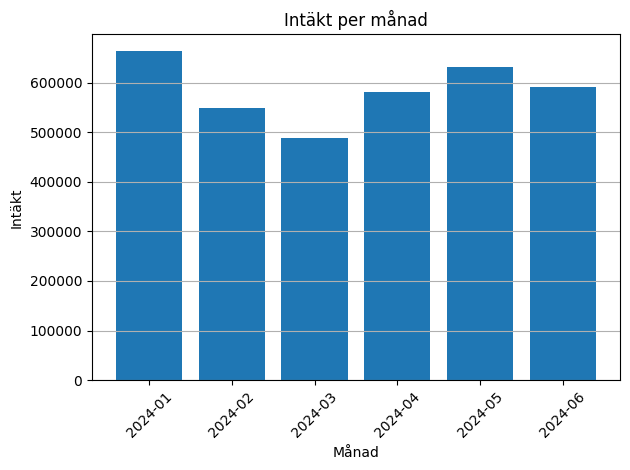

In [ ]:
df["month"] = df["date"].dt.to_period("M")
sumclass = df.groupby("month")["revenue"].sum().reset_index()

fig, ax = plt.subplots()
ax.bar(sumclass["month"].astype(str), sumclass["revenue"])      # astype(str) måste finnas för att x -axeln ska funka
ax.set_title("Intäkt per månad")
ax.set_xlabel("Månad")
ax.set_ylabel("Intäkt")
ax.grid(True, axis="y")

plt.setp(ax.get_xticklabels(), rotation=45) 
plt.tight_layout()
plt.show()

In [25]:
df["week"] = df["date"].dt.to_period("W")
revenue_week = df.groupby("week")["revenue"].sum()

# Det är störande att veckorna sorteras inte från högsta till lägsta omsättning, så jag testar:
sorted_weeks = sumclass.sort_values(by="revenue", ascending= False)

print(sorted_weeks)
display(sorted_weeks)

                     week    revenue
22  2024-06-03/2024-06-09  166384.34
3   2024-01-22/2024-01-28  165832.80
0   2024-01-01/2024-01-07  161119.04
15  2024-04-15/2024-04-21  157775.20
20  2024-05-20/2024-05-26  156746.92
2   2024-01-15/2024-01-21  147225.11
14  2024-04-08/2024-04-14  146409.48
21  2024-05-27/2024-06-02  144516.63
25  2024-06-24/2024-06-30  142431.78
17  2024-04-29/2024-05-05  140330.00
18  2024-05-06/2024-05-12  139988.87
1   2024-01-08/2024-01-14  136568.68
8   2024-02-26/2024-03-03  135071.28
24  2024-06-17/2024-06-23  134604.41
7   2024-02-19/2024-02-25  130817.18
5   2024-02-05/2024-02-11  129235.14
9   2024-03-04/2024-03-10  125966.50
4   2024-01-29/2024-02-04  124154.34
19  2024-05-13/2024-05-19  123365.13
16  2024-04-22/2024-04-28  123154.55
6   2024-02-12/2024-02-18  120294.76
13  2024-04-01/2024-04-07  117292.87
12  2024-03-25/2024-03-31  114609.06
23  2024-06-10/2024-06-16  109619.70
10  2024-03-11/2024-03-17  109400.74
11  2024-03-18/2024-03-24   99852.72


,week,revenue
22,2024-06-03/2024-06-09,166384.34
3,2024-01-22/2024-01-28,165832.80
0,2024-01-01/2024-01-07,161119.04
15,2024-04-15/2024-04-21,157775.20
20,2024-05-20/2024-05-26,156746.92
2,2024-01-15/2024-01-21,147225.11
14,2024-04-08/2024-04-14,146409.48
21,2024-05-27/2024-06-02,144516.63
25,2024-06-24/2024-06-30,142431.78
17,2024-04-29/2024-05-05,140330.00


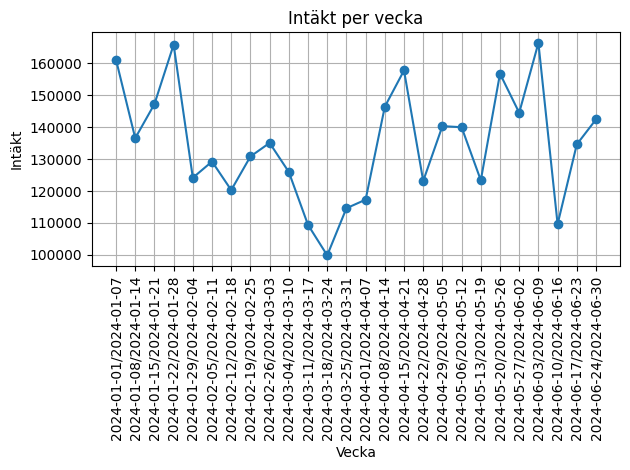

In [20]:
df["week"] = df["date"].dt.to_period("W")
sumclass = df.groupby("week")["revenue"].sum().reset_index()

fig, ax = plt.subplots()
ax.plot(sumclass["week"].astype(str), sumclass["revenue"], marker='o')  # Linjegraf förkortning = plot och "o" visar varje datapunkt
ax.set_title("Intäkt per vecka")
ax.set_xlabel("Vecka")
ax.set_ylabel("Intäkt")
ax.grid(True)

plt.setp(ax.get_xticklabels(), rotation=90) 
plt.tight_layout()
plt.show()

## Rekomendationer när det gäller intäkter per månad/vecka:

- Tänk på en stark marknadsföring under januari och maj. Dessa månader visar redan höga intäkter och har potential att generera ännu större omsättning.

- Fundera över åtgärder för att motverka nedgången i mars, (kanske kampanjer eller rabatter) för att jämna ut intäktsnivåerna. 

- Fortsätt analysera och jobba med veckoresultaten för att få fram och identifera återkommande veckor med toppar/dalar och anpassa bemanning och lager därefter för maximal effektivitet och besparing. 